In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, sklearn.model_selection, sklearn.ensemble, sklearn.neighbors, sklearn.inspection

# Pandas

### Ceate Dataframe

In [352]:
data = {"x1":[0, 0.4, 0.15, 0.05, 0.4, 0.20, 0, 0.45, 1, 0.85, 0.9, 0.7, 0.65, 0.95, 1, 0.8],
"x2":[0.2, 0.35, 0, 0.10, 0.4, 0.25, 0.40, 0.35, 0.85, 0.95, 1, 0.65, 0.75, 0.9, 0.9, 0.95],
"y":[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]}

df_scatter = pd.DataFrame(data)

### Load data from a csv file

In [353]:
df_onehot=pd.read_csv('PSID_earnings_onehot.csv', index_col=0)

### Show info

In [354]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4165 entries, 1 to 4165
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience        4165 non-null   int64 
 1   weeks             4165 non-null   int64 
 2   education         4165 non-null   int64 
 3   occupation_white  4165 non-null   int64 
 4   industry_yes      4165 non-null   int64 
 5   south_yes         4165 non-null   int64 
 6   smsa_yes          4165 non-null   int64 
 7   married_yes       4165 non-null   int64 
 8   gender_male       4165 non-null   int64 
 9   union_yes         4165 non-null   int64 
 10  ethnicity_other   4165 non-null   int64 
 11  wage_class        4165 non-null   object
dtypes: int64(11), object(1)
memory usage: 423.0+ KB


### Show first 5 rows

In [355]:
df_onehot.head(5)

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other,wage_class
1,3,32,9,1,0,1,0,1,1,0,1,low
2,4,43,9,1,0,1,0,1,1,0,1,low
3,5,40,9,1,0,1,0,1,1,0,1,low
4,6,39,9,1,0,1,0,1,1,0,1,low
5,7,42,9,1,1,1,0,1,1,0,1,low


### Get Statistics of the dataset

In [356]:
df_onehot.describe()

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,19.853782,46.811525,12.845378,0.488836,0.395438,0.290276,0.653782,0.814406,0.887395,0.363986,0.927731
std,10.966370,5.129098,2.787995,0.499935,0.489003,0.453944,0.475821,0.388826,0.316147,0.481202,0.258964
min,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,46.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,18.000000,48.000000,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,29.000000,50.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,51.000000,52.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Find the average experience if a person is married

In [357]:
df_onehot.loc[df_onehot["married_yes"] == 1].experience.mean()

20.694575471698112

### Show the average experience gouped by gender (groupby)(plot)

<AxesSubplot: ylabel='gender_male'>

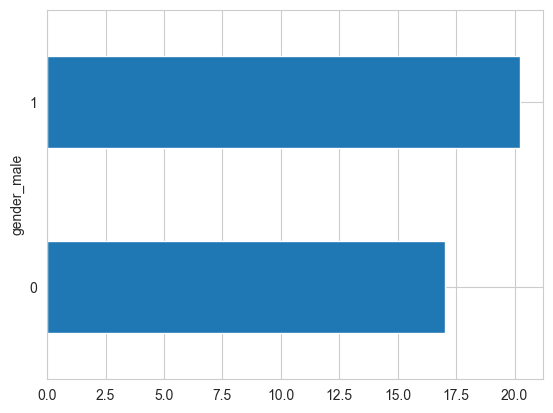

In [358]:
df_onehot.groupby(["gender_male"])["experience"].mean().plot(kind="barh")

### show the data distribution when looking at marriel status (value_count)(Pie chart)

<AxesSubplot: ylabel='married_yes'>

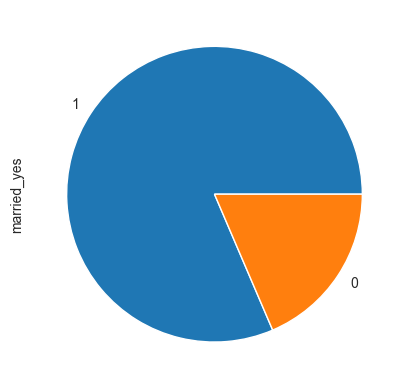

In [359]:
df_onehot["married_yes"].value_counts().plot(kind="pie")

### Create Corrolation Matrix Features

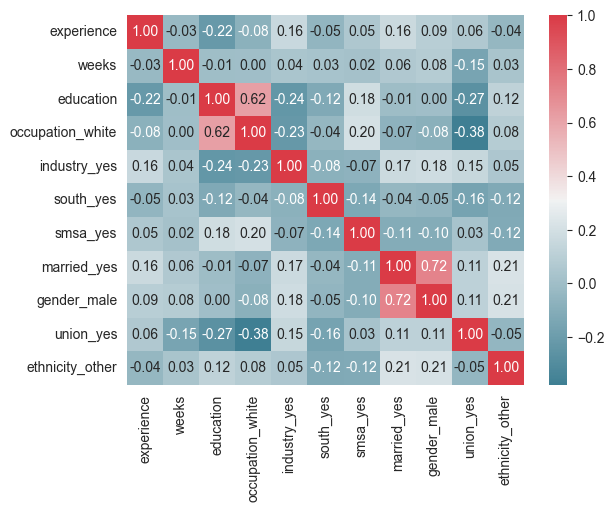

In [360]:
features = [lbl for lbl in list(df_onehot.head(0)) if lbl != "wage_class"]
corr = df_onehot[features].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap,fmt=".2f")
plt.show()

#### Correlated most positively/negatively

In [361]:
listOfCorrolation = corr.stack().reset_index()
listOfCorrolation.columns = ['F1', 'F2', 'Corr']
mask_to_remove = (listOfCorrolation[['F1', 'F2']].apply(frozenset, axis=1).duplicated()) | (listOfCorrolation['F1']==listOfCorrolation['F2'])
listOfCorrolation_clean = listOfCorrolation[~mask_to_remove]
listOfCorrolation_clean['Corr_abs'] = listOfCorrolation_clean['Corr'].abs()

/var/folders/bz/qg9t79ns4q58lqlw2ptfgw740000gn/T/ipykernel_11476/2596144689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listOfCorrolation_clean['Corr_abs'] = listOfCorrolation_clean['Corr'].abs()


##### Most positively

In [362]:
listOfCorrolation_clean.sort_values(by=['Corr'], ascending=False).head(10)

,F1,F2,Corr,Corr_abs
85,married_yes,gender_male,0.722762,0.722762
25,education,occupation_white,0.619383,0.619383
87,married_yes,ethnicity_other,0.214978,0.214978
98,gender_male,ethnicity_other,0.208577,0.208577
39,occupation_white,smsa_yes,0.201812,0.201812
28,education,smsa_yes,0.184296,0.184296
52,industry_yes,gender_male,0.177805,0.177805
51,industry_yes,married_yes,0.170100,0.170100
7,experience,married_yes,0.160626,0.160626
4,experience,industry_yes,0.159062,0.159062


##### Most negatively

In [363]:
listOfCorrolation_clean.sort_values(by=['Corr'], ascending=True).head(10)

,F1,F2,Corr,Corr_abs
42,occupation_white,union_yes,-0.378419,0.378419
31,education,union_yes,-0.269511,0.269511
26,education,industry_yes,-0.236454,0.236454
37,occupation_white,industry_yes,-0.226049,0.226049
2,experience,education,-0.218199,0.218199
64,south_yes,union_yes,-0.162777,0.162777
20,weeks,union_yes,-0.154833,0.154833
61,south_yes,smsa_yes,-0.135002,0.135002
65,south_yes,ethnicity_other,-0.121812,0.121812
27,education,south_yes,-0.121645,0.121645


### Clean up the dataframe

In [364]:
df_onehot.dropna(inplace=True)
df_onehot.isnull().sum() # Shows if there are values that are none

experience          0
weeks               0
education           0
occupation_white    0
industry_yes        0
south_yes           0
smsa_yes            0
married_yes         0
gender_male         0
union_yes           0
ethnicity_other     0
wage_class          0
dtype: int64

### Select Columns

In [365]:
column_labels = list(df_onehot.head(0))
print(column_labels)

['experience', 'weeks', 'education', 'occupation_white', 'industry_yes', 'south_yes', 'smsa_yes', 'married_yes', 'gender_male', 'union_yes', 'ethnicity_other', 'wage_class']


In [366]:
df_X = df_onehot[[lbl for lbl in column_labels if lbl != "wage_class"]]
df_X

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other
1,3,32,9,1,0,1,0,1,1,0,1
2,4,43,9,1,0,1,0,1,1,0,1
3,5,40,9,1,0,1,0,1,1,0,1
4,6,39,9,1,0,1,0,1,1,0,1
5,7,42,9,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4161,3,50,12,1,0,0,1,0,0,0,1
4162,4,49,12,1,0,0,1,0,0,0,1
4163,5,50,12,1,0,0,1,0,0,0,1
4164,6,50,12,1,0,0,1,0,0,0,1


In [367]:
df_y = df_onehot["wage_class"]
df_y

1       low
2       low
3       low
4       low
5       low
       ... 
4161    low
4162    low
4163    low
4164    low
4165    low
Name: wage_class, Length: 4165, dtype: object

### Visualize the data

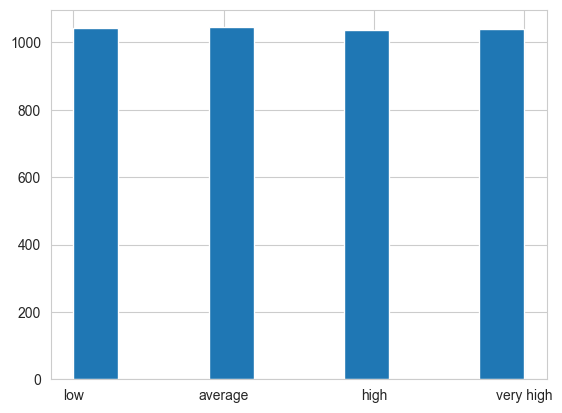

In [368]:
df_y.hist()
plt.show()

### Create numpy array from dataframe

In [369]:
X = df_X.to_numpy()
y = df_y.to_numpy()

array([[ 3, 32,  9, ...,  1,  0,  1],
       [ 4, 43,  9, ...,  1,  0,  1],
       [ 5, 40,  9, ...,  1,  0,  1],
       ...,
       [ 5, 50, 12, ...,  0,  0,  1],
       [ 6, 50, 12, ...,  0,  0,  1],
       [ 7, 50, 12, ...,  0,  0,  1]])

# Sklearn

### Test Train split

In [370]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=67)

### Standardize the data

In [371]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Plot ROC Curve

In [372]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label = 'random classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Plot RPC Curve

In [373]:
def plot_rpc(recall, precision):
    plt.plot(recall, precision, color='orange', label='RPC')
    plt.ylabel('Precision')
    plt.xlabel('Recall = True Positive Rate')
    plt.title('Recall-Precision Curve')
    plt.legend()
    plt.show()

### Train and evaluate a model

In [374]:
def train(model, average, X_train, X_test, y_train, y_test,isMultiClass=False,returnDict = True):
    model.fit(X_train, y_train)
    model_results_test = model.predict(X_test)
    model_results_train = model.predict(X_train)

    train_precision_score = sklearn.metrics.precision_score(y_train,model_results_train , average=average)
    test_precision_score = sklearn.metrics.precision_score(y_test, model_results_test, average=average)

    train_recall_score = sklearn.metrics.recall_score(y_train, model_results_train, average=average)
    test_recall_score = sklearn.metrics.recall_score(y_test, model_results_test, average=average)

    train_accuracy_score = sklearn.metrics.accuracy_score(y_train, model_results_train)
    test_accuracy_score = sklearn.metrics.accuracy_score(y_test, model_results_test)

    train_f1_score = sklearn.metrics.f1_score(y_train, model_results_train, average=average)
    test_f1_score = sklearn.metrics.f1_score(y_test, model_results_test, average=average)

    cm_abs = sklearn.metrics.confusion_matrix(y_test, model_results_test, labels=model.classes_)
    cm_norm = sklearn.metrics.confusion_matrix(y_test, model_results_test, labels=model.classes_,normalize="true")

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

    disp_abs = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_abs, display_labels=model.classes_)
    disp_norm = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=model.classes_)

    classification_report_test = sklearn.metrics.classification_report(y_test,model_results_test, labels=model.classes_)
    classification_report_train = sklearn.metrics.classification_report(y_train,model_results_train, labels=model.classes_)

    disp_abs.plot(ax=ax1)
    ax1.set_title('Absolute')
    ax1.grid(False)

    disp_norm.plot(ax=ax2)
    ax2.set_title('Normalized')
    ax2.grid(False)
    plt.show()

    score = {"train_precision_score":train_precision_score,"test_precision_score":test_precision_score,
             "train_recall_score":train_recall_score,"test_recall_score":test_recall_score,
             "train_accuracy_score":train_accuracy_score,"test_accuracy_score":test_accuracy_score,
             "train_f1_score":train_f1_score,"test_f1_score":test_f1_score}


    if not isMultiClass:
        model_results = model.predict_proba(X_test)
        model_results = model_results[:, 1]
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, model_results)
        auc = sklearn.metrics.roc_auc_score(y_test, model_results)
        plot_roc_curve(fpr, tpr)
        score["test_auc"] = auc

        precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, model_results)
        plot_rpc(recall, precision)
        average_precision = sklearn.metrics.average_precision_score(y_test, model_results)
        score["average_precision"] = average_precision

    if returnDict:
        return score
    else:
        print(f"{'Test':-^53s}\n" + classification_report_test + f"\n{'Train':-^53s}\n" + classification_report_train)

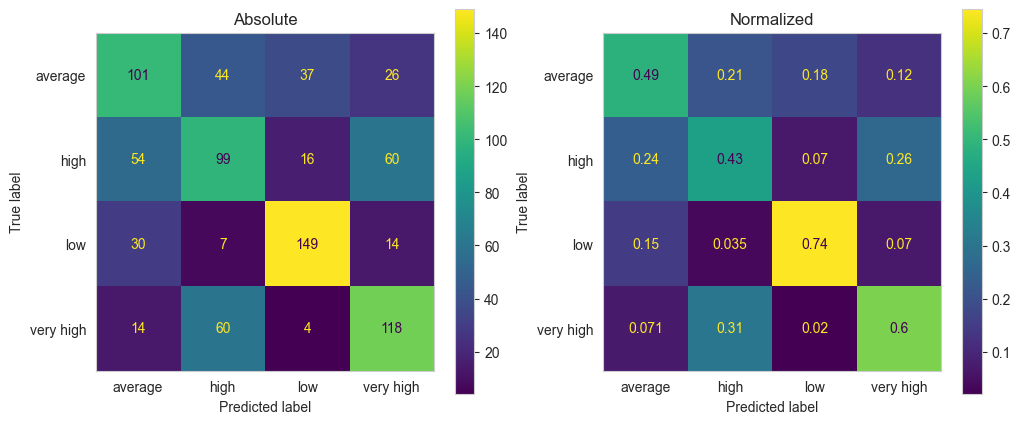

------------------------Test-------------------------
              precision    recall  f1-score   support

     average       0.51      0.49      0.50       208
        high       0.47      0.43      0.45       229
         low       0.72      0.74      0.73       200
   very high       0.54      0.60      0.57       196

    accuracy                           0.56       833
   macro avg       0.56      0.57      0.56       833
weighted avg       0.56      0.56      0.56       833

------------------------Train------------------------
              precision    recall  f1-score   support

     average       0.96      0.97      0.97       837
        high       0.97      0.95      0.96       808
         low       0.98      0.98      0.98       842
   very high       0.96      0.97      0.97       845

    accuracy                           0.97      3332
   macro avg       0.97      0.97      0.97      3332
weighted avg       0.97      0.97      0.97      3332



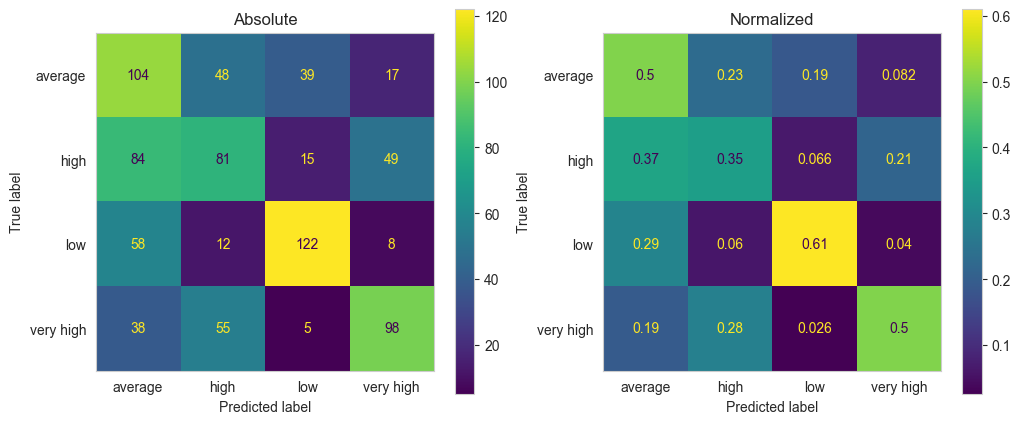

------------------------Test-------------------------
              precision    recall  f1-score   support

     average       0.37      0.50      0.42       208
        high       0.41      0.35      0.38       229
         low       0.67      0.61      0.64       200
   very high       0.57      0.50      0.53       196

    accuracy                           0.49       833
   macro avg       0.51      0.49      0.49       833
weighted avg       0.50      0.49      0.49       833

------------------------Train------------------------
              precision    recall  f1-score   support

     average       0.61      0.82      0.70       837
        high       0.72      0.63      0.67       808
         low       0.89      0.77      0.83       842
   very high       0.82      0.75      0.78       845

    accuracy                           0.74      3332
   macro avg       0.76      0.74      0.75      3332
weighted avg       0.76      0.74      0.75      3332



In [375]:
train(sklearn.ensemble.RandomForestClassifier(),"macro",X_train, X_test, y_train, y_test,isMultiClass=True,returnDict=False)
train(sklearn.neighbors.KNeighborsClassifier(n_neighbors=3),"macro",X_train, X_test, y_train, y_test,isMultiClass=True,returnDict=False)

### Grid Search

In [376]:
def gridSearch(model,params_input,X_train,y_train,detailedOutput=False,**kwargs):
    clf= sklearn.model_selection.GridSearchCV(model, params_input, n_jobs=-1,**kwargs)
    clf.fit(X_train, y_train)

    print(f"{'Best parameters':-^51s}")
    for key in clf.best_params_.keys():
        if not isinstance(clf.best_params_[key],str):
            value = str(clf.best_params_[key])
        else:
            value = clf.best_params_[key]

        print(f"{key:30s}:{value:20s}")
    print(51*"-")

    if detailedOutput:
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        params = clf.cv_results_['params']
        combinedValues = sorted(zip(means, stds,params),key=lambda x:x[0],reverse=True)
        print(f"\n\n{'Detailed View':-^51s}")
        print(f"{'score':^11s}|")
        for mean, std, param in combinedValues:
            print(f"{mean:05.3f}±{std:05.3f}|{param}")

        if len(list(params_input.keys())) == 1:
            plt.plot([param[list(param.keys())[0]] for param in params],means)
            plt.fill_between([param[list(param.keys())[0]] for param in params], np.array(means) + np.array(stds), np.array(means) - np.array(stds), alpha=0.15, color='blue')
            plt.xlabel(list(params_input.keys())[0])
            plt.ylabel("Score")
            plt.show()

    return clf

------------------Best parameters------------------
n_estimators                  :200                 
---------------------------------------------------


-------------------Detailed View-------------------
   score   |
0.541±0.027|{'n_estimators': 200}
0.540±0.026|{'n_estimators': 100}
0.539±0.026|{'n_estimators': 50}
0.514±0.036|{'n_estimators': 10}


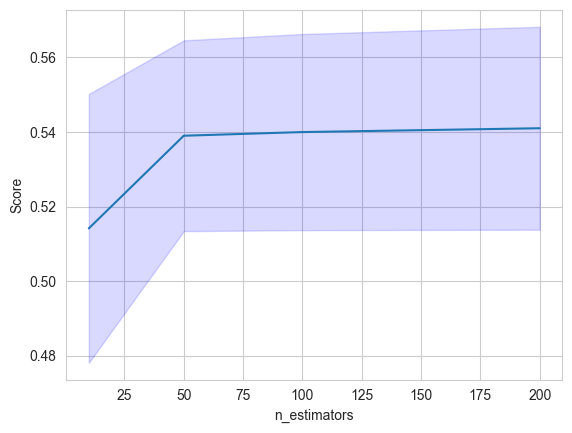

In [377]:
rf=sklearn.ensemble.RandomForestClassifier()
params= {'n_estimators':[10,50,100,200]}

bestmodel = gridSearch(rf,params,X_train=X_train,y_train=y_train,detailedOutput=True,scoring="f1_macro",cv=10)

### Permutation Importance

In [378]:
def permutationImportance(model,features_names,X_train,y_train,**kwargs):
    importances = sklearn.inspection.permutation_importance(model, X_train, y_train,n_jobs=-1,**kwargs)

    forest_importances = pd.Series(importances.importances_mean, index=features_names)

    sort_index = np.argsort(forest_importances)[::-1]

    fig, ax = plt.subplots()
    forest_importances[sort_index].plot.bar(yerr=importances.importances_std[sort_index], ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

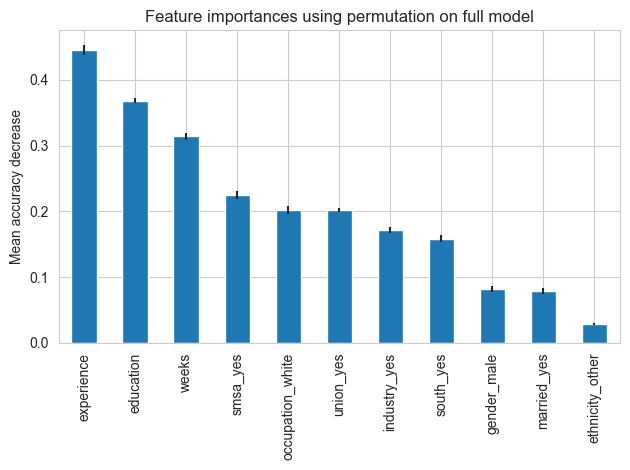

In [379]:
permutationImportance(bestmodel,column_labels[:-1],X_train,y_train,n_repeats=10,random_state=42)

### KNN with ROC / Recall-Precision Curve

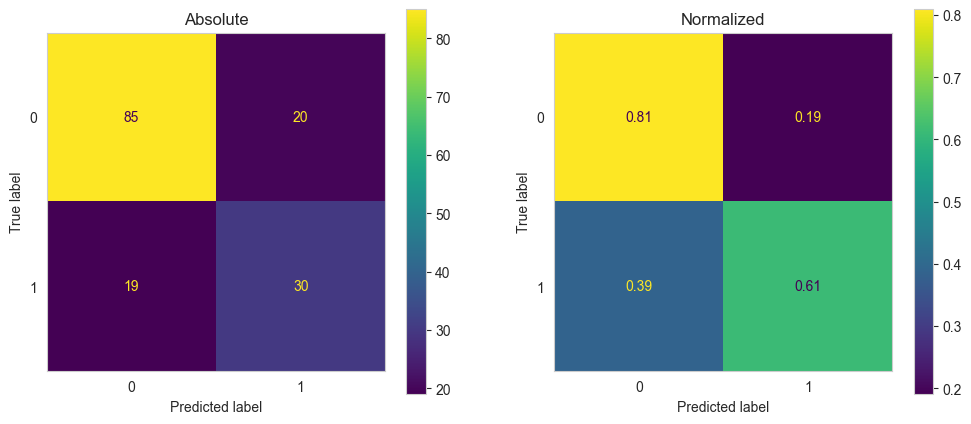

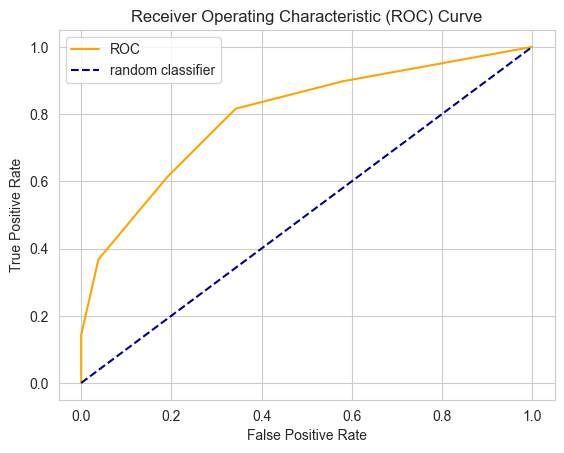

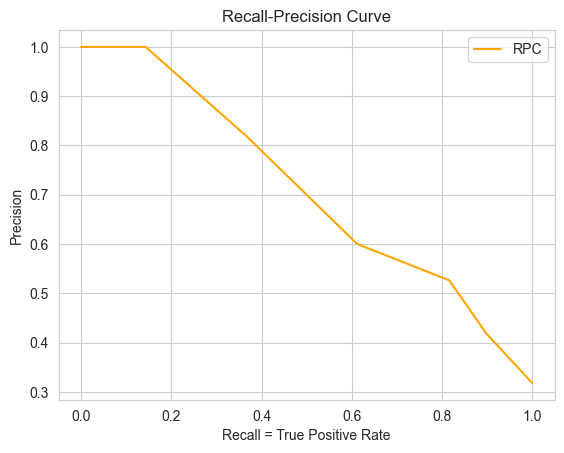

------------------------Test-------------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.60      0.61      0.61        49

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

------------------------Train------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       395
           1       0.72      0.66      0.69       219

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.78      0.79      0.78       614



In [380]:
df = pd.read_csv('DiabetesDataset.csv')
x = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values
labels = ["No Diabetes", "Diabetes"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

train(sklearn.neighbors.KNeighborsClassifier(n_neighbors=5),"macro",X_train, X_test, y_train, y_test,isMultiClass=False,returnDict=False)